In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### import data 

In [2]:
#import twilight concert date data
import pickle

In [3]:
twilight_date = pickle.load(open('./Data/twilight_date','rb')) 

In [4]:
#import crime data
crime = pd.read_csv('./Data/Police_Incidents_Final.csv')

C:\Users\chao_gu\Anaconda3\envs\stats\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
import datetime

In [6]:
crime['incident date'] = crime['Date Occurred'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))

In [7]:
#drop data on 2018 since only have data for Jan.
crime = crime.loc[crime.Year != 2018]

In [8]:
crime_sort = crime.groupby('incident date')['incident date'].count()

In [9]:
crime_larceny = crime.loc[crime['UCR Level 2']=='Larceny'].groupby('incident date')['incident date'].count()

In [10]:
#import call service data
call_1 = pickle.load(open('./Data/cleaned_call_for_service_1','rb'))
call_2 = pickle.load(open('./Data/cleaned_call_for_service_2','rb'))
call_3 = pickle.load(open('./Data/cleaned_call_for_service_3','rb'))
call = pd.concat([call_1,call_2,call_3])

In [11]:
call_sort = call.groupby('incident date')['incident date'].count()

In [12]:
call_B001 = call[call['Beat'] == 'B001']

In [13]:
call_B001_sort = call_B001.groupby('incident date')['incident date'].count()

In [14]:
opendate = datetime.datetime(2016,5,20)

### data viz

In [15]:
def data_viz(df,window = 30, center = False):
    df_rolling = df.rolling(window = window, center = center).mean()
    plt.figure(figsize=(20, 5))
    plt.plot(df_rolling.index,df_rolling,color = 'blue')
    plt.xlabel('date')
    plt.ylabel('count')
    
    for i in range(twilight_date.shape[0]):
        plt.axvline(twilight_date.loc[i,'date'],ls = '--', lw = 1,color = 'green')

    plt.axvline(opendate,ls = '--',lw = 1,color ='r')
    plt.show()
    return

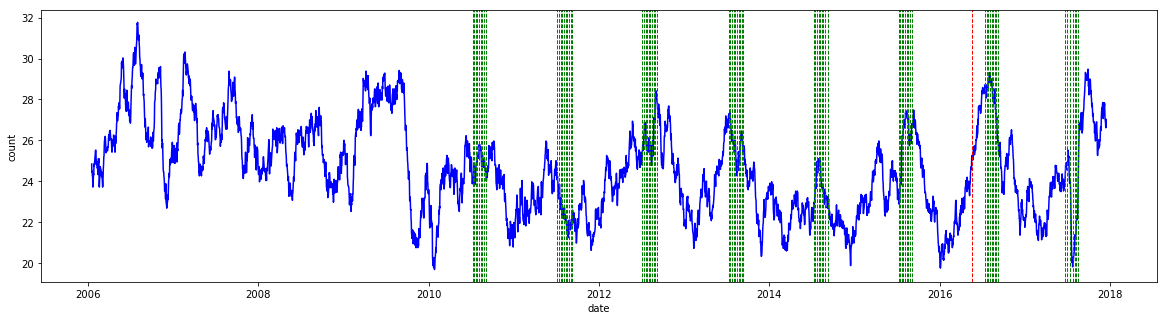

In [16]:
data_viz(crime_sort,window = 31,center = True)

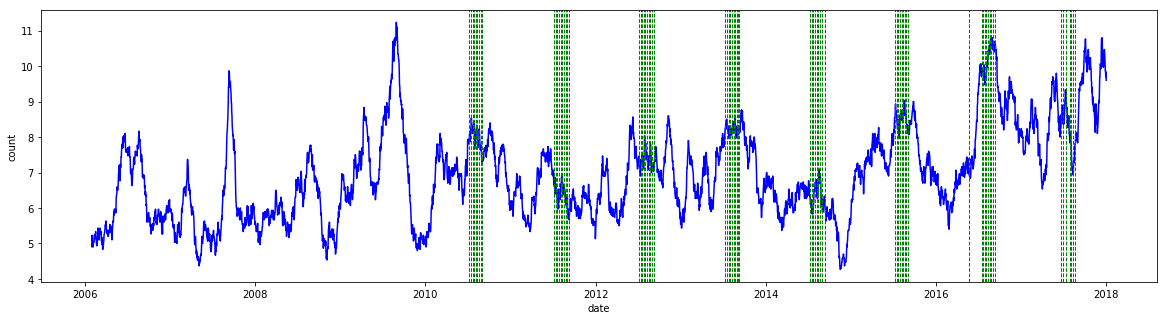

In [17]:
data_viz(crime_larceny)

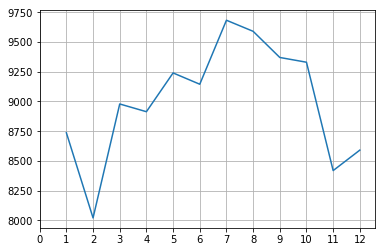

In [24]:
#cumulative crime occurance in different month
crime_month = crime.groupby('Month')['incident date'].count()
plt.plot(crime_month.index,crime_month)
plt.xticks(range(13))
plt.grid(True)
plt.show()

In [19]:
#monthly crime occurance in different year
crime_monthly = crime.groupby(['Year','Month'])['Month'].count()

In [27]:
crime_year = crime.groupby('Year')['Year'].count()

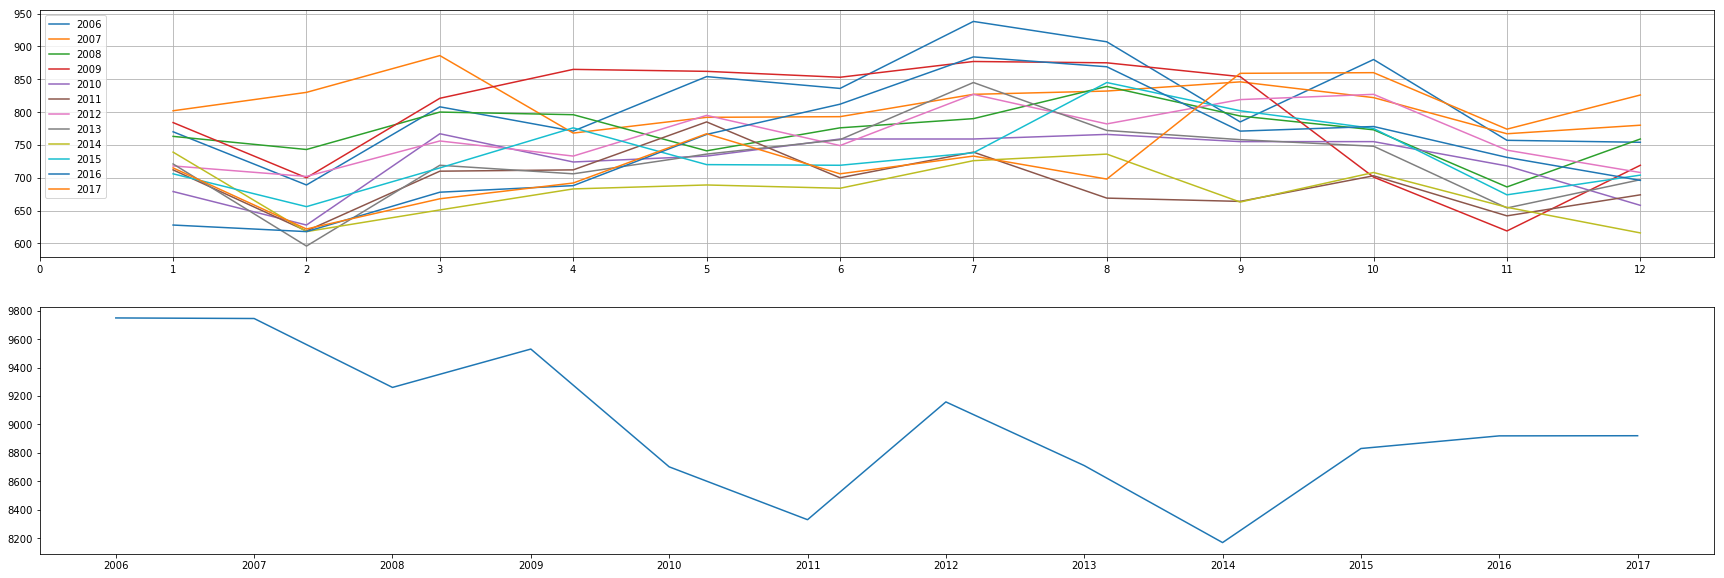

In [30]:
plt.figure(figsize = (30,10))
plt.subplot(2,1,1)
for year in crime_monthly.index.get_level_values(0).unique():
    monthly_count = crime_monthly[year]
    plt.plot(monthly_count.index, monthly_count,label = '%s'%year)
plt.xticks(range(13))
plt.grid(True)
plt.legend(loc = 2)

plt.subplot(2,1,2)
plt.plot(crime_year.index,crime_year)
plt.xticks (range(2006,2018))
plt.show()

In [39]:
crime_2010 = crime.loc[crime.Year > 2009]

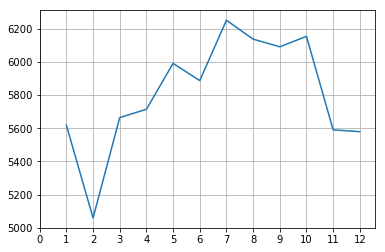

In [40]:
crime_month_2010 = crime_2010.groupby('Month')['incident date'].count()
plt.plot(crime_month_2010.index,crime_month_2010)
plt.xticks(range(13))
plt.grid(True)
plt.show()

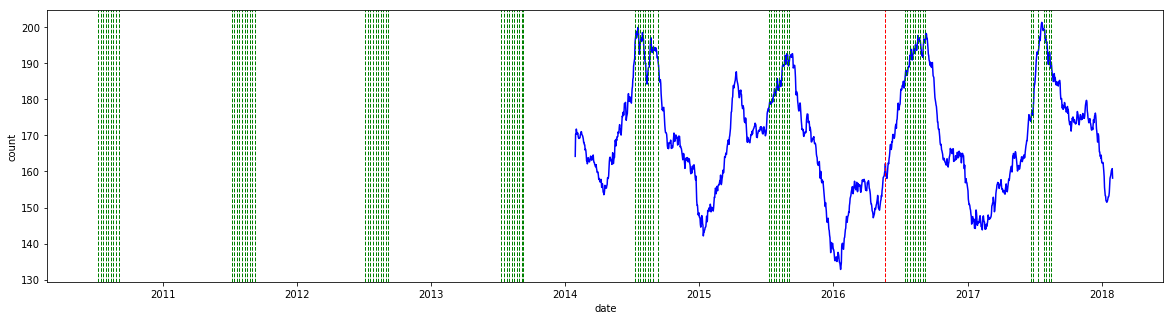

In [42]:
data_viz(call_B001_sort)

### interactive graph

In [68]:
from matplotlib.widgets import Slider, Button, RadioButtons
%matplotlib notebook

<IPython.core.display.Javascript object>


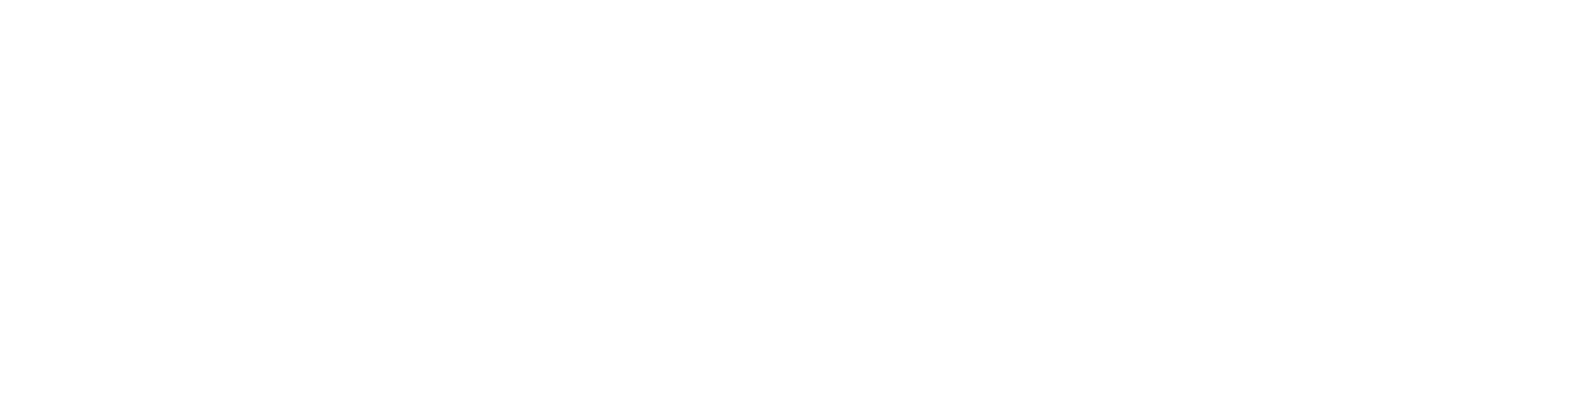

<IPython.core.display.Javascript object>


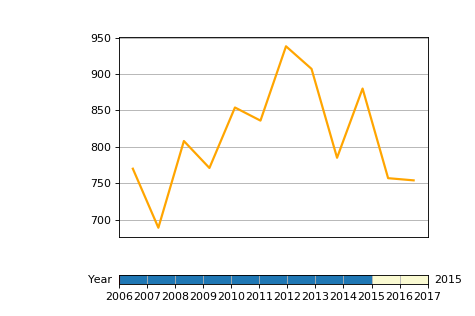

In [78]:
plt.figure(figsize=(20,5))
fig,ax = plt.subplots()
plt.subplots_adjust(left = 0.25, bottom = 0.25)

plt.xticks(range(2006,2018))
plt.grid(True)

init_year = 2006
l = plt.plot(range(1,13),crime_monthly[init_year], color = 'orange',lw = 2)

axcolor = "lightgoldenrodyellow"
axyear = plt.axes([0.25,0.1,0.65,0.03],facecolor = axcolor)
syear = Slider(axyear,'Year',2006,2017,valfmt = '%0.0f', valinit = init_year, dragging = False )

def update(val):
    year = int(syear.val)
    plt.xticks(range(2006,2018))
    plt.grid(True)
    l.set_ydata(range(2006,2018))
    fig.canvas.draw_idle()
    
syear.on_changed(update)
plt.show()